In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime
import os

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
start=datetime.now()
start_string=start.strftime('%Y/%m/%d %H:%M:%S')

csv_files = []
for dirname, _, filenames in os.walk('./MachineLearningCSV/MachineLearningCVE'):
    for filename in filenames:
        csv_file = os.path.join(dirname, filename)
        print(os.path.join(dirname, filename))
        csv_files.append(csv_file)
end=datetime.now()
end_string=end.strftime('%Y/%m/%d %H:%M:%S')
print(f'\n[DONE] start: {start_string}, end: {end_string}')
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./MachineLearningCSV/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv
./MachineLearningCSV/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv
./MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
./MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
./MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv
./MachineLearningCSV/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv
./MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
./MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv

[DONE] start: 2022/07/26 16:47:05, end: 2022/07/26 16:47:05


In [2]:
start=datetime.now()
start_string=start.strftime('%Y/%m/%d %H:%M:%S')

df = pd.concat([pd.read_csv(file) for file in csv_files], ignore_index=True)
df.columns = df.columns.str.strip()
print("original length of df:", len(df))
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)
df=df[df.Label!='BENIGN']
print("after droping null values and 'BENIGN', the length of df:", len(df))
# df_experiment = df.loc[df.Label.str.contains(pat='DoS|BENIGN',na=False)]
# df_experiment = df_experiment.loc[~(df_experiment.Label =="DoS Slowhttptest") ]


df_experiment=df.copy()
del df
end=datetime.now()
end_string=end.strftime('%Y/%m/%d %H:%M:%S')
print(f'\n[DONE] start: {start_string}, end: {end_string}')

original length of df: 2830743
after droping null values and 'BENIGN', the length of df: 556556

[DONE] start: 2022/07/26 16:47:07, end: 2022/07/26 16:47:18


In [3]:
start=datetime.now()
start_string=start.strftime('%Y/%m/%d %H:%M:%S')

#df.Label.value_counts()

#data_with_index=df_experiment.set_index('Label')
#data_with_index.head()

df_experiment.Label.replace("Web.*", "Web Attack", regex=True, inplace=True)
df_experiment.Label.replace(r'.*Patator$', "Brute Force", regex=True,inplace=True)
df_experiment.Label.replace(["DoS GoldenEye", "DoS Hulk", "DoS Slowhttptest", "DoS slowloris"], "DoS", inplace=True)
#df_experiment=df_experiment.loc[df_experiment['Label']!='BENIGN']
print(df_experiment.Label.value_counts())
end=datetime.now()
end_string=end.strftime('%Y/%m/%d %H:%M:%S')
print(f'\n[DONE] start: {start_string}, end: {end_string}')
df_experiment.head(10)
#print('\n[DONE]')

DoS             251712
PortScan        158804
DDoS            128025
Brute Force      13832
Web Attack        2180
Bot               1956
Infiltration        36
Heartbleed          11
Name: Label, dtype: int64

[DONE] start: 2022/07/26 16:47:21, end: 2022/07/26 16:47:22


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
11347,80,5216127,3,1,0,0,0,0,0.0,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Brute Force
11348,21,20,1,1,0,0,0,0,0.0,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Brute Force
11349,21,38,1,1,0,0,0,0,0.0,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Brute Force
11350,21,80,1,1,0,0,0,0,0.0,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Brute Force
11351,21,68,1,1,0,0,0,0,0.0,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Brute Force
11352,21,47,1,1,0,0,0,0,0.0,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Brute Force
11354,21,83,1,1,0,0,0,0,0.0,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Brute Force
11355,21,265,2,1,14,0,14,0,7.0,9.899495,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Brute Force
11356,21,3302859,6,6,36,76,22,0,6.0,9.633276,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Brute Force
11357,21,3,2,0,14,0,14,0,7.0,9.899495,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Brute Force


In [4]:
#For multi classifiaction
start=datetime.now()
start_string=start.strftime('%Y/%m/%d %H:%M:%S')

from sklearn.model_selection import train_test_split
from collections import Counter
y = df_experiment.Label
X = df_experiment.drop(columns='Label')
labels = y.unique()
classes = y.nunique()

print(f'Shape of X: {X.shape}')
print(f'Number of labels: {classes}')
print(f'labels: {labels}')
print(f'[Instances per label]\n{y.value_counts()}')


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
                                                  test_size=0.15, 
                                                  random_state=42, 
                                                  stratify=y_train)
# print(len(df_experiment))
# print(df_experiment.Label.nunique())
# print(df_experiment.Label.value_counts())
print("\n[after spliting the data (training data)]")
print(f'training data length {len(X_train)}')
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'[Instances per label]\n{y_train.value_counts()}')
print(y_train.value_counts(normalize=True))

print("\n[after spliting the data (val data)]")
print(f'Shape of X_val: {X_val.shape}')
print(f'Shape of y_val: {y_val.shape}')
print(f'[Instances per label]\n{y_val.value_counts()}')
print(y_val.value_counts(normalize=True))

print("\n[after spliting the data (test data)]")
print(f'test data length {len(X_test)}')
print(f'Shape of X_train: {X_test.shape}')
print(f'Shape of y_train: {y_test.shape}')
print(f'[Instances per label]\n{y_test.value_counts()}')
print(y_test.value_counts(normalize=True))
# print(y_train.nunique())
# print(y_train.value_counts())
end=datetime.now()
end_string=end.strftime('%Y/%m/%d %H:%M:%S')
print(f'\n[DONE] start: {start_string}, end: {end_string}')

Shape of X: (556556, 78)
Number of labels: 8
labels: ['Brute Force' 'Infiltration' 'PortScan' 'Bot' 'DoS' 'Heartbleed'
 'Web Attack' 'DDoS']
[Instances per label]
DoS             251712
PortScan        158804
DDoS            128025
Brute Force      13832
Web Attack        2180
Bot               1956
Infiltration        36
Heartbleed          11
Name: Label, dtype: int64

[after spliting the data (training data)]
training data length 378457
Shape of X_train: (378457, 78)
Shape of y_train: (378457,)
[Instances per label]
DoS             171164
PortScan        107986
DDoS             87057
Brute Force       9405
Web Attack        1482
Bot               1330
Infiltration        25
Heartbleed           8
Name: Label, dtype: int64
DoS             0.452268
PortScan        0.285332
DDoS            0.230031
Brute Force     0.024851
Web Attack      0.003916
Bot             0.003514
Infiltration    0.000066
Heartbleed      0.000021
Name: Label, dtype: float64

[after spliting the data (val data)]

In [5]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
start=datetime.now()
start_string=start.strftime('%Y/%m/%d %H:%M:%S')

# enc = OneHotEncoder(handle_unknown='ignore')
scaler = MinMaxScaler()
le = LabelEncoder()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
print("instances per label in training set\n", y_train.value_counts())
y_train = le.fit_transform(y_train)
print("instances per label in test set\n", y_test.value_counts())
y_val = le.transform(y_val)
y_test = le.transform(y_test)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
labels_dict = dict(zip(le.classes_, range(len(le.classes_))))
print(labels_dict)


### training data sampling
print('[Sampling Start]')
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter
over = SMOTE(sampling_strategy='not majority', n_jobs=-1)
steps = [('o', over)]
pipeline = Pipeline(steps=steps)
X_train, y_train = pipeline.fit_resample(X_train, y_train)
counter = Counter(y_train)
X_sampled_train=pd.DataFrame(X_train)
y_sampled_train=pd.DataFrame(y_train)
print("\n[After sampling training data]")
print(f'training data length {len(X_sampled_train)}')
print(f'Shape of X_sampled_train: {X_sampled_train.shape}')
print(f'Shape of y_sampled_train: {y_sampled_train.shape}')
print(f'[Instances per label]\n{y_sampled_train.value_counts()}')
print(y_sampled_train.value_counts(normalize=True))

del X_sampled_train
del y_sampled_train
end=datetime.now()
end_string=end.strftime('%Y/%m/%d %H:%M:%S')
print(f'\n[DONE] start: {start_string}, end: {end_string}')

instances per label in training set
 DoS             171164
PortScan        107986
DDoS             87057
Brute Force       9405
Web Attack        1482
Bot               1330
Infiltration        25
Heartbleed           8
Name: Label, dtype: int64
instances per label in test set
 DoS             50343
PortScan        31761
DDoS            25605
Brute Force      2767
Web Attack        436
Bot               391
Infiltration        7
Heartbleed          2
Name: Label, dtype: int64
(378457, 78)
(66787, 78)
(111312, 78)
{'Bot': 0, 'Brute Force': 1, 'DDoS': 2, 'DoS': 3, 'Heartbleed': 4, 'Infiltration': 5, 'PortScan': 6, 'Web Attack': 7}
[Sampling Start]

[After sampling training data]
training data length 1369312
Shape of X_sampled_train: (1369312, 78)
Shape of y_sampled_train: (1369312, 1)
[Instances per label]
0    171164
1    171164
2    171164
3    171164
4    171164
5    171164
6    171164
7    171164
dtype: int64
0    0.125
1    0.125
2    0.125
3    0.125
4    0.125
5    0.125
6    0.1

shape of X_train:	(1369312, 1, 78)
shape of X_val:	(66787, 1, 78)
shape of X_test:	(111312, 1, 78)
shape of y_train:	(1369312,)
shape of y_train2:	(1369312, 8)
shape of y_val:	(66787,)
shape of y_val2:	(66787, 8)
shape of y_test:	(111312,)
shape of y_test2:	(111312, 8)
y_train2: [[0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]]
y_test2: [3 3 2 3 3 2 2 3 3 3]
num of classes:8
78


2022-07-26 16:54:39.973803: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-26 16:54:39.986021: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-26 16:54:39.986943: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-26 16:54:39.988773: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30)                13080     
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 softmax (Dense)             (None, 8)                 248       
                                                                 
Total params: 13,328
Trainable params: 13,328
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200


2022-07-26 16:54:42.640131: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8100


21396/21396 [==============================] - 43s 2ms/step - loss: 0.4861 - precision: 0.9317 - recall: 0.7506 - accuracy: 0.8509 - f1_score: 0.8503 - val_loss: 0.1974 - val_precision: 0.9774 - val_recall: 0.9754 - val_accuracy: 0.9756 - val_f1_score: 0.7897
Epoch 2/200
21396/21396 [==============================] - 41s 2ms/step - loss: 0.1458 - precision: 0.9588 - recall: 0.9492 - accuracy: 0.9538 - f1_score: 0.9537 - val_loss: 0.0969 - val_precision: 0.9838 - val_recall: 0.9818 - val_accuracy: 0.9829 - val_f1_score: 0.8190
Epoch 3/200
21396/21396 [==============================] - 41s 2ms/step - loss: 0.0817 - precision: 0.9813 - recall: 0.9774 - accuracy: 0.9795 - f1_score: 0.9795 - val_loss: 0.0624 - val_precision: 0.9900 - val_recall: 0.9863 - val_accuracy: 0.9894 - val_f1_score: 0.8681
Epoch 4/200
21396/21396 [==============================] - 41s 2ms/step - loss: 0.0579 - precision: 0.9842 - recall: 0.9827 - accuracy: 0.9835 - f1_score: 0.9834 - val_loss: 0.0500 - val_precision

21396/21396 [==============================] - 40s 2ms/step - loss: 0.0177 - precision: 0.9931 - recall: 0.9930 - accuracy: 0.9931 - f1_score: 0.9931 - val_loss: 0.0134 - val_precision: 0.9974 - val_recall: 0.9974 - val_accuracy: 0.9974 - val_f1_score: 0.9419
Epoch 32/200
21396/21396 [==============================] - 40s 2ms/step - loss: 0.0172 - precision: 0.9932 - recall: 0.9931 - accuracy: 0.9931 - f1_score: 0.9931 - val_loss: 0.0125 - val_precision: 0.9982 - val_recall: 0.9982 - val_accuracy: 0.9982 - val_f1_score: 0.9451
Epoch 33/200
21396/21396 [==============================] - 40s 2ms/step - loss: 0.0167 - precision: 0.9932 - recall: 0.9931 - accuracy: 0.9932 - f1_score: 0.9932 - val_loss: 0.0128 - val_precision: 0.9981 - val_recall: 0.9981 - val_accuracy: 0.9981 - val_f1_score: 0.9438
Epoch 34/200
21396/21396 [==============================] - 40s 2ms/step - loss: 0.0163 - precision: 0.9933 - recall: 0.9932 - accuracy: 0.9932 - f1_score: 0.9932 - val_loss: 0.0128 - val_precis

21396/21396 [==============================] - 40s 2ms/step - loss: 0.0072 - precision: 0.9984 - recall: 0.9983 - accuracy: 0.9984 - f1_score: 0.9984 - val_loss: 0.0089 - val_precision: 0.9992 - val_recall: 0.9988 - val_accuracy: 0.9992 - val_f1_score: 0.9605
Epoch 62/200
21396/21396 [==============================] - 41s 2ms/step - loss: 0.0069 - precision: 0.9985 - recall: 0.9984 - accuracy: 0.9984 - f1_score: 0.9984 - val_loss: 0.0085 - val_precision: 0.9992 - val_recall: 0.9992 - val_accuracy: 0.9992 - val_f1_score: 0.9598
Epoch 63/200
21396/21396 [==============================] - 40s 2ms/step - loss: 0.0067 - precision: 0.9985 - recall: 0.9984 - accuracy: 0.9985 - f1_score: 0.9985 - val_loss: 0.0088 - val_precision: 0.9990 - val_recall: 0.9990 - val_accuracy: 0.9990 - val_f1_score: 0.9575
Epoch 64/200
21396/21396 [==============================] - 40s 2ms/step - loss: 0.0066 - precision: 0.9985 - recall: 0.9984 - accuracy: 0.9985 - f1_score: 0.9985 - val_loss: 0.0089 - val_precis

21396/21396 [==============================] - 40s 2ms/step - loss: 0.0039 - precision: 0.9993 - recall: 0.9992 - accuracy: 0.9993 - f1_score: 0.9993 - val_loss: 0.0072 - val_precision: 0.9993 - val_recall: 0.9993 - val_accuracy: 0.9993 - val_f1_score: 0.9601
Epoch 92/200
21396/21396 [==============================] - 40s 2ms/step - loss: 0.0039 - precision: 0.9993 - recall: 0.9993 - accuracy: 0.9993 - f1_score: 0.9993 - val_loss: 0.0073 - val_precision: 0.9993 - val_recall: 0.9993 - val_accuracy: 0.9993 - val_f1_score: 0.9597
Epoch 93/200
21396/21396 [==============================] - 40s 2ms/step - loss: 0.0038 - precision: 0.9993 - recall: 0.9993 - accuracy: 0.9993 - f1_score: 0.9993 - val_loss: 0.0073 - val_precision: 0.9994 - val_recall: 0.9994 - val_accuracy: 0.9994 - val_f1_score: 0.9611
Epoch 94/200
21396/21396 [==============================] - 40s 2ms/step - loss: 0.0037 - precision: 0.9993 - recall: 0.9993 - accuracy: 0.9993 - f1_score: 0.9993 - val_loss: 0.0074 - val_precis

Epoch 121/200
21396/21396 [==============================] - 40s 2ms/step - loss: 0.0027 - precision: 0.9996 - recall: 0.9995 - accuracy: 0.9996 - f1_score: 0.9996 - val_loss: 0.0063 - val_precision: 0.9995 - val_recall: 0.9995 - val_accuracy: 0.9995 - val_f1_score: 0.9716
Epoch 122/200
21396/21396 [==============================] - 40s 2ms/step - loss: 0.0029 - precision: 0.9995 - recall: 0.9995 - accuracy: 0.9995 - f1_score: 0.9995 - val_loss: 0.0063 - val_precision: 0.9994 - val_recall: 0.9994 - val_accuracy: 0.9994 - val_f1_score: 0.9704
Epoch 123/200
21396/21396 [==============================] - 41s 2ms/step - loss: 0.0028 - precision: 0.9996 - recall: 0.9995 - accuracy: 0.9996 - f1_score: 0.9996 - val_loss: 0.0062 - val_precision: 0.9995 - val_recall: 0.9995 - val_accuracy: 0.9995 - val_f1_score: 0.9721
Epoch 124/200
21396/21396 [==============================] - 40s 2ms/step - loss: 0.0027 - precision: 0.9995 - recall: 0.9995 - accuracy: 0.9995 - f1_score: 0.9995 - val_loss: 0.

Epoch 151/200
21396/21396 [==============================] - 40s 2ms/step - loss: 0.0022 - precision: 0.9996 - recall: 0.9996 - accuracy: 0.9996 - f1_score: 0.9996 - val_loss: 0.0059 - val_precision: 0.9994 - val_recall: 0.9994 - val_accuracy: 0.9994 - val_f1_score: 0.9705
Epoch 152/200
21396/21396 [==============================] - 40s 2ms/step - loss: 0.0023 - precision: 0.9996 - recall: 0.9996 - accuracy: 0.9996 - f1_score: 0.9996 - val_loss: 0.0058 - val_precision: 0.9994 - val_recall: 0.9994 - val_accuracy: 0.9994 - val_f1_score: 0.9710
Epoch 153/200
21396/21396 [==============================] - 41s 2ms/step - loss: 0.0022 - precision: 0.9996 - recall: 0.9996 - accuracy: 0.9996 - f1_score: 0.9996 - val_loss: 0.0061 - val_precision: 0.9993 - val_recall: 0.9993 - val_accuracy: 0.9993 - val_f1_score: 0.9692
Epoch 154/200
21396/21396 [==============================] - 41s 2ms/step - loss: 0.0022 - precision: 0.9996 - recall: 0.9996 - accuracy: 0.9996 - f1_score: 0.9996 - val_loss: 0.

Epoch 181/200
21396/21396 [==============================] - 41s 2ms/step - loss: 0.0019 - precision: 0.9997 - recall: 0.9997 - accuracy: 0.9997 - f1_score: 0.9997 - val_loss: 0.0056 - val_precision: 0.9994 - val_recall: 0.9994 - val_accuracy: 0.9994 - val_f1_score: 0.9703
Epoch 182/200
21396/21396 [==============================] - 40s 2ms/step - loss: 0.0019 - precision: 0.9997 - recall: 0.9997 - accuracy: 0.9997 - f1_score: 0.9997 - val_loss: 0.0053 - val_precision: 0.9995 - val_recall: 0.9995 - val_accuracy: 0.9995 - val_f1_score: 0.9714
Epoch 183/200
21396/21396 [==============================] - 40s 2ms/step - loss: 0.0019 - precision: 0.9997 - recall: 0.9997 - accuracy: 0.9997 - f1_score: 0.9997 - val_loss: 0.0052 - val_precision: 0.9995 - val_recall: 0.9995 - val_accuracy: 0.9995 - val_f1_score: 0.9724
Epoch 184/200
21396/21396 [==============================] - 40s 2ms/step - loss: 0.0019 - precision: 0.9997 - recall: 0.9997 - accuracy: 0.9997 - f1_score: 0.9997 - val_loss: 0.

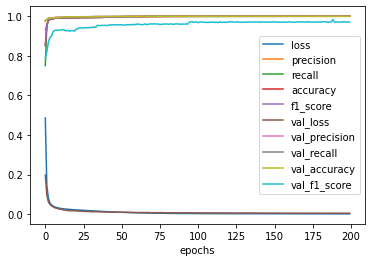


[DONE] start: 2022/07/26 16:54:38, end: 2022/07/26 19:09:40


In [6]:
### reshape input data to LSTM format [samples, time_steps, features]
start=datetime.now()
start_string=start.strftime('%Y/%m/%d %H:%M:%S')

import tensorflow_addons as tfa
import tensorflow as tf
from model_evaluator import Evaluator
from sklearn.metrics import recall_score, precision_score, f1_score
from tensorflow.keras import Model, Sequential, Input, backend
from tensorflow.keras.layers import LSTM, Dense, Dropout, InputLayer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

n_classes = len(le.classes_)
X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_val_lstm = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
y_train2=tf.keras.utils.to_categorical(y_train, num_classes=n_classes)
y_val2=tf.keras.utils.to_categorical(y_val, num_classes=n_classes)
y_test2=tf.keras.utils.to_categorical(y_test, num_classes=n_classes)

print(f"shape of X_train:\t{X_train_lstm.shape}")
print(f"shape of X_val:\t{X_val_lstm.shape}")
print(f"shape of X_test:\t{X_test_lstm.shape}")
print(f"shape of y_train:\t{y_train.shape}")
print(f"shape of y_train2:\t{y_train2.shape}")
print(f"shape of y_val:\t{y_val.shape}")
print(f"shape of y_val2:\t{y_val2.shape}")
print(f"shape of y_test:\t{y_test.shape}")
print(f"shape of y_test2:\t{y_test2.shape}")

print(f'y_train2: {y_train2[:10]}')
print(f'y_test2: {y_test[:10]}')

print(f"num of classes:{n_classes}")
n_features = X_train_lstm.shape[2]
print(n_features)

def multiClassModel(n_features, n_classes=9):
    adam=Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
    model = Sequential()
    model.add(Input(shape=(None, n_features)))
    #model.add(InputLayer(shape=(None, n_features)))
    model.add(LSTM(units=30))
    model.add(Dropout(0.2))
    model.add(Dense(n_classes, activation="softmax", name="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=[tf.keras.metrics.Precision(name='precision'),
                                                                              tf.keras.metrics.Recall(name='recall'),
                                                                              'accuracy',
                                                                              tfa.metrics.F1Score(num_classes=n_classes,
                                                                                                  average='macro')])
    #model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=[Evaluator.precision, 
    #                                                                          Evaluator.recall,
    #                                                                          'accuracy',
    #                                                                          Evaluator.fmeasure])

    model.summary()
    return model

callback = EarlyStopping(patience=20, mode='min', restore_best_weights=True)
backend.clear_session()
model = multiClassModel(n_features, n_classes)
history = model.fit(X_train_lstm, y_train2, 
                    epochs=200, batch_size=64, validation_data=(X_val_lstm, y_val2), callbacks=[callback])
                    #epochs=5, batch_size=64, validation_split=0.2, callbacks=[callback])

### check the history of epochs
#pd.DataFrame(history.history).plot(kind='line', xlabel='epochs', figsize=(8, 6))
pd.DataFrame(history.history).plot(kind='line', xlabel='epochs')

import matplotlib.pyplot as plt
plt.show()
end=datetime.now()
end_string=end.strftime('%Y/%m/%d %H:%M:%S')
print(f'\n[DONE] start: {start_string}, end: {end_string}')


In [7]:
start=datetime.now()
start_string=start.strftime('%Y/%m/%d %H:%M:%S')

y_train_pred_prob = model.predict(X_train_lstm)
y_test_pred_prob = model.predict(X_test_lstm)
y_train_pred = np.argmax(y_train_pred_prob, axis=1)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)
end=datetime.now()
end_string=end.strftime('%Y/%m/%d %H:%M:%S')
print(f'\n[DONE] start: {start_string}, end: {end_string}')


[DONE] start: 2022/07/26 19:23:49, end: 2022/07/26 19:24:16



[DONE] start: 2022/07/26 19:24:22, end: 2022/07/26 19:24:22


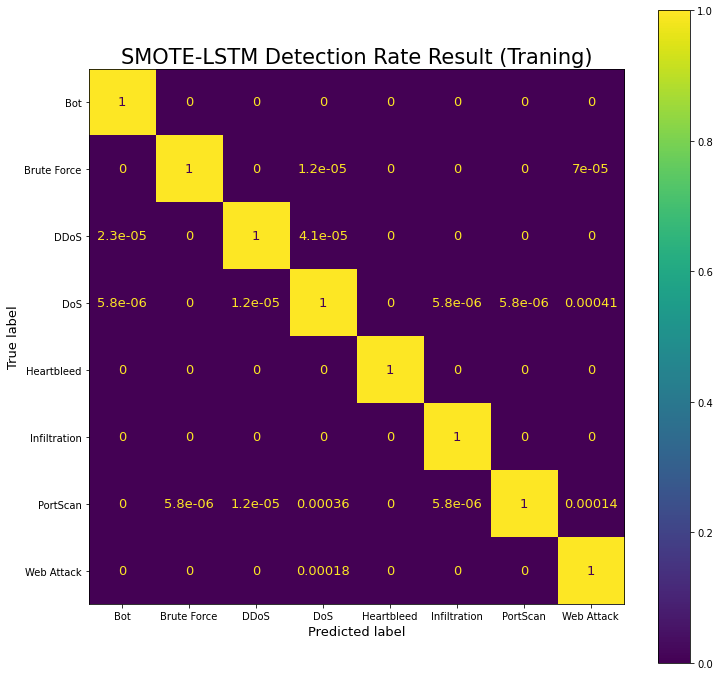

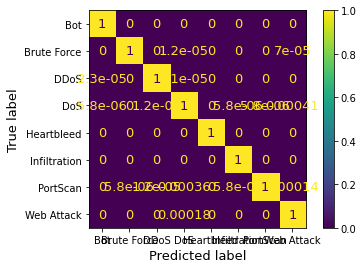

In [8]:
start=datetime.now()
start_string=start.strftime('%Y/%m/%d %H:%M:%S')

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from numpy import argmax

%matplotlib inline
y_train3=argmax(y_train2, axis=1)
plt.rc('font', size=13)        # 기본 폰트 크기
plt.rc('axes', labelsize=13)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=10)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=10)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=10)  # 범례 폰트 크기
plt.rc('figure', titlesize=80) # figure title 폰트 크기

fig, ax = plt.subplots(figsize=(12, 12))
ax.set_title('SMOTE-LSTM Detection Rate Result (Traning)',fontdict={'size':'21'})

ConfusionMatrixDisplay.from_predictions(y_train3, y_train_pred, display_labels=le.classes_, normalize='true').plot(ax=ax)
end=datetime.now()
end_string=end.strftime('%Y/%m/%d %H:%M:%S')
print(f'\n[DONE] start: {start_string}, end: {end_string}')


[DONE] start: 2022/07/26 19:24:32, end: 2022/07/26 19:24:32


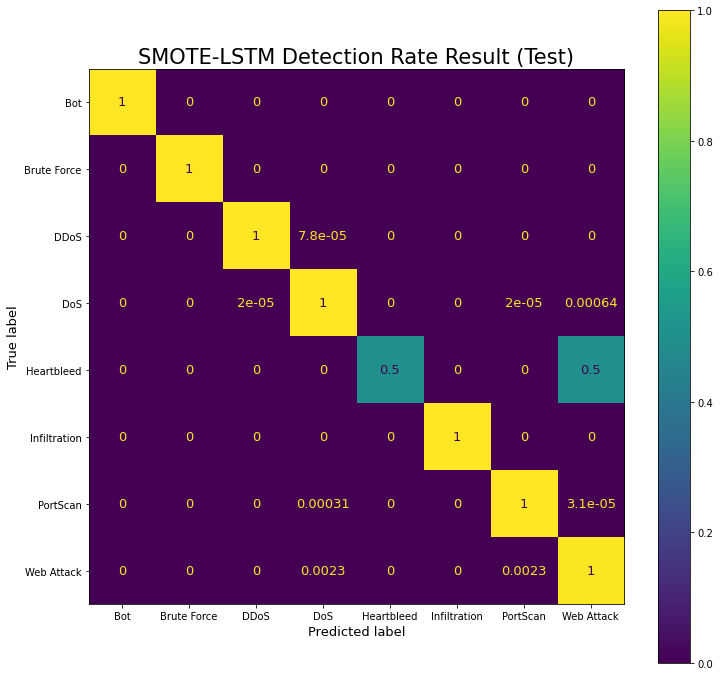

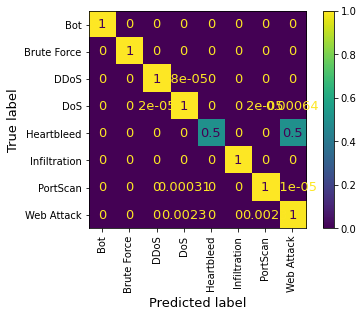

In [9]:
start=datetime.now()
start_string=start.strftime('%Y/%m/%d %H:%M:%S')

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from numpy import argmax

%matplotlib inline
y_test3=argmax(y_test2, axis=1)
plt.rc('font', size=13)        # 기본 폰트 크기
plt.rc('axes', labelsize=13)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=10)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=10)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=10)  # 범례 폰트 크기
plt.rc('figure', titlesize=80) # figure title 폰트 크기


fig, ax = plt.subplots(figsize=(12, 12))
ax.set_title('SMOTE-LSTM Detection Rate Result (Test)',fontdict={'size':'21'})
ConfusionMatrixDisplay.from_predictions(y_test3, y_test_pred, display_labels=le.classes_, normalize='true',
                                       xticks_rotation='vertical').plot(ax=ax)


end=datetime.now()
end_string=end.strftime('%Y/%m/%d %H:%M:%S')
print(f'\n[DONE] start: {start_string}, end: {end_string}')

In [10]:
start=datetime.now()
start_string=start.strftime('%Y/%m/%d %H:%M:%S')

from sklearn.metrics import classification_report, multilabel_confusion_matrix


def multilabel_matrix(y_true, y_pred, labels=None):
    mlm = multilabel_confusion_matrix(y_true, y_pred, labels=labels)
    df_performance = pd.DataFrame(index=labels, columns=['accuracy', 'precision', 'recall', 'f1_score'])
    for i, label in enumerate(labels):
        tn, fp, fn, tp = mlm[i].ravel()
        accuracy = (tn + tp) / (tn + fp + fn + tp)
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)

        f1_score = 2*precision * recall / (precision + recall)
        df_performance.loc[label] = [round(accuracy, 4), round(precision,4), \
                                     round(recall, 4), round(f1_score,4)]
    return df_performance



y_train_pred_labels = le.inverse_transform(y_train_pred)
y_train_labels = le.inverse_transform(y_train)
print(classification_report(y_train_labels, y_train_pred_labels, digits=4, labels=le.classes_))
end=datetime.now()
end_string=end.strftime('%Y/%m/%d %H:%M:%S')
print(f'\n[DONE] start: {start_string}, end: {end_string}')



              precision    recall  f1-score   support

         Bot     1.0000    1.0000    1.0000    171164
 Brute Force     1.0000    0.9999    1.0000    171164
        DDoS     1.0000    0.9999    1.0000    171164
         DoS     0.9994    0.9996    0.9995    171164
  Heartbleed     1.0000    1.0000    1.0000    171164
Infiltration     1.0000    1.0000    1.0000    171164
    PortScan     1.0000    0.9995    0.9997    171164
  Web Attack     0.9994    0.9998    0.9996    171164

    accuracy                         0.9998   1369312
   macro avg     0.9998    0.9998    0.9998   1369312
weighted avg     0.9998    0.9998    0.9998   1369312


[DONE] start: 2022/07/26 19:24:43, end: 2022/07/26 19:25:11


In [11]:
start=datetime.now()
start_string=start.strftime('%Y/%m/%d %H:%M:%S')

from sklearn.metrics import classification_report, multilabel_confusion_matrix


def multilabel_matrix(y_true, y_pred, labels=None):
    mlm = multilabel_confusion_matrix(y_true, y_pred, labels=labels)
    df_performance = pd.DataFrame(index=labels, columns=['accuracy', 'precision', 'recall', 'f1_score'])
    for i, label in enumerate(labels):
        tn, fp, fn, tp = mlm[i].ravel()
        accuracy = (tn + tp) / (tn + fp + fn + tp)
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)

        f1_score = 2*precision * recall / (precision + recall)
        df_performance.loc[label] = [round(accuracy, 4), round(precision,4), \
                                     round(recall, 4), round(f1_score,4)]
    return df_performance



y_test_pred_labels = le.inverse_transform(y_test_pred)
y_test_labels = le.inverse_transform(y_test)
print(classification_report(y_test_labels, y_test_pred_labels, digits=4, labels=le.classes_))
end=datetime.now()
end_string=end.strftime('%Y/%m/%d %H:%M:%S')
print(f'\n[DONE] start: {start_string}, end: {end_string}')


              precision    recall  f1-score   support

         Bot     1.0000    1.0000    1.0000       391
 Brute Force     1.0000    1.0000    1.0000      2767
        DDoS     1.0000    0.9999    0.9999     25605
         DoS     0.9997    0.9993    0.9995     50343
  Heartbleed     1.0000    0.5000    0.6667         2
Infiltration     1.0000    1.0000    1.0000         7
    PortScan     0.9999    0.9997    0.9998     31761
  Web Attack     0.9274    0.9954    0.9602       436

    accuracy                         0.9996    111312
   macro avg     0.9909    0.9368    0.9533    111312
weighted avg     0.9996    0.9996    0.9996    111312


[DONE] start: 2022/07/26 19:25:14, end: 2022/07/26 19:25:16


In [12]:
from model_evaluator2 import Evaluator
print('\n[DONE]')


[DONE]
